# Fashion MNIST with Keras
Reference: Chapter Ten (O'Reilly)

Fashion MNIST is the same structure as the Handwriting MNIST dataset. 28 x 28 pixels each with 10 classes.

In [2]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(tf.keras.__version__)

2.11.0
2.11.0


In [3]:
## load in the fasion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train, = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [7]:
class_names= ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [8]:
# create a function that displays an image with its label based on the index
import matplotlib.pyplot as plt
import numpy as np

   
def plot_image(image_array, label_array, num):
    image=image_array[num]
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    label = class_names[label_array[num]]
    plt.title(label)
    plt.show()





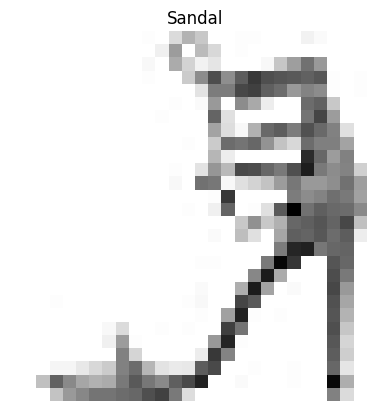

In [9]:
plot_image(X_train, y_train, 65)


# Create the Model Using Sequential API

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


## Explaination of the dense layers added in the above sequential call to Keras.

The first line creates a Sequential model. Simple and easy; they may only express models with a single input and a single output via a simple stack of layers.

The FLATTEN layer is built into the model first. Its role is to flatten the image into a 1D array for preprocessing purposes (think grayscaling). As the first layer, one should specify the input shape, which doesn't include the batch size, only the shape of instances.

Next, we add a DENSE layer with 300 neurons. Each Desnse layer manages its own weight matrix, containing all the connectino weights between the neurons and their inputs. 

We then add another DENSE layer with 100 neurons to further funnel the outputs.

Last, we add a DENSE output layher with 10 neurons (ONE per CLASS) using the softmax function (because the classes are EXCLUSIVE).

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note that Dense layers (unlike what playground.tensorflow.org may have impressed), DENSE layers tend to have a LOT of parameters. 

In this case, the first layer has *784 (pixel matrixes) x 300* connection weights (per neuron), plus *300 bias terms* (per neuron), which end up to *235,500 parameters*. This gives us much flexibility but risks overfitting.

In [12]:
model.layers

You can get a model's list of layers, to fetch a layer by index, or you can fetch it by name.

In [13]:
hidden1 = model.layers[1]

In [14]:
hidden1.name

'dense'

In [15]:
model.layers

In [16]:
model.get_layer('dense') is hidden1

True

All parameters of a layer can be accessed by using its 'get_weights()' and 'set_weights' functions. For Dense layers, this includes both the connection weights and the bias terms.

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights

array([[ 0.01574272,  0.05237927, -0.01451744, ...,  0.06405631,
         0.02836704, -0.03587539],
       [ 0.0006768 , -0.03543326,  0.0236786 , ...,  0.06217554,
        -0.07145028, -0.01801378],
       [-0.03628799, -0.01630032,  0.02972706, ..., -0.0291434 ,
        -0.0611466 , -0.04482324],
       ...,
       [-0.01415578,  0.00139068,  0.02821316, ..., -0.04401932,
         0.03315192,  0.04015375],
       [-0.06161185,  0.06281669, -0.06079974, ...,  0.05691531,
        -0.03824452,  0.05963716],
       [ 0.07014225,  0.05492368, -0.0555634 , ..., -0.05314562,
         0.0320917 ,  0.04797882]], dtype=float32)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
weights.shape

(784, 300)

In [21]:
biases.shape

(300,)

After creating a model, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can also specify a list of extra metrics to compute during training and evaluation:

In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Training and Evaluation
# TODO - EXPLAINATION

"Sparse Categorical Cross Entropy" is the loss called upon because we have "sparse labels" (i.e. for each instance there is a target class index from 0 to 9). 

If we had one target probability per class for each instance (such as with one-hot vectors to represent a class) we'd use "categorical_crossentropy" loss instead. If we were doing binary classification we'd use "sigmoid (i.e. logistic) activation in the output layer instead of "softmax" activation and we'd use "binary_crossentrophy" loss.

As we call the .fit() method, we pass in the input features (X_train) and the target classes (y_train). We set a number of epochs, and optionally, a validation data set. 

**Loss** - The differenc between the predicted output of a neural network and the actual output. This should be going down with further epochs.


Keras will measure the loss and extra metrics on this set at the end of each epoch. This is useful for gauging how well the model is performing. If performance on the training set is much better than on the validation set, the model is probably overfitting the training set. 

In [23]:
# Training and Evaluation
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7244 - accuracy: 0.7593 - val_loss: 0.4959 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4881 - accuracy: 0.8303 - val_loss: 0.4471 - val_accuracy: 0.8512
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4432 - accuracy: 0.8436 - val_loss: 0.4130 - val_accuracy: 0.8638
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4167 - accuracy: 0.8538 - val_loss: 0.4085 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3950 - accuracy: 0.8609 - val_loss: 0.3743 - val_accuracy: 0.8734
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3790 - accuracy: 0.8658 - val_loss: 0.3841 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3649 - accuracy: 0.8713 - val_loss: 0.3774 - val_accuracy:

The neural network is now trained. The "fit" method of the model returns a History object containing the training parameters and their history. 

This can be used to create a plot.

In [24]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

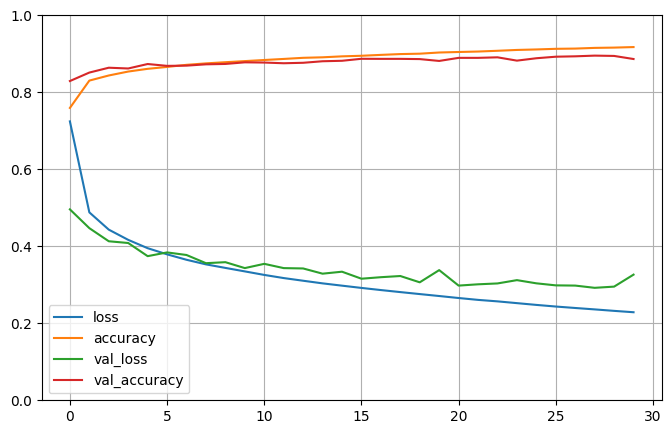

In [25]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### EXPLAINATION for above
The loss and accuracy curves should more or less correllate to the validation loss and accuracy curves. Otherwise we'd have overfitting.

If not satisified, one can tune the hyperparemeters. Among them is to first check the...

    -Learning Rate
    -Optimizer
    -Number of layers
    -Number of neurons per layer
    -Batch size
    -Types of activation for each hidden layer

Next you can evaluate your model on a test set.

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 86.2342 - accuracy: 0.8221


[86.23419952392578, 0.8220999836921692]

In [27]:
# Using the model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 [==============================] - 0s 70ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 17ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Building Regression MLP using Sequential API
Let's go back to the California Housing Data Problem and do it with Keras. 

In [30]:
# We'll use the sklearn version of the dataset as it contains only numerical features and no missing values
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()


In [31]:
# Show the housing data
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [32]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [34]:
# Building a Regression MLP Using the Sequential API
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), 
                                    keras.layers.Dense(1)])

# time to compile the model
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8541 - val_loss: 4.2891
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5410 - val_loss: 4.1149
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4681 - val_loss: 0.4280
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4148 - val_loss: 0.4098
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4036 - val_loss: 0.4005
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3962 - val_loss: 0.4010
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4012 - val_loss: 0.4008
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3870 - val_loss: 0.3944
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3815 - val_loss: 0.3932
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3827 - val_loss: 0.3966

In [35]:
# test the mse
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 38ms/step


In [36]:
# print the mse
print(mse_test)

0.36576369404792786


In [37]:
#print the root mean squared error
print(np.sqrt(mse_test))

0.6047840061112131


# Keras Functional API
The Keras Sequential API is rather simple to use, but sometimes you need something  with more complex topologies, or multiple inputs or outputs. For this purpose, Keras offers the **Functional API**.

One example is a *Wide and Deep* neural network. This connects all or part of the inputs *directly* to the output layer. This makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a normal MLP forces all data to flow through the full stack of layers. Simple data patterns may end up distored by this sequence of transformations.

In [38]:
#First, we create the input object. This is a specification for the kind of input we want to feed to our model, including its shape and dtype.
input_ = keras.layers.Input(shape=X_train.shape[1:])
#Next, we create the first hidden layer, specifying the number of neurons and the activation function. 
# Note that as soon as it's created we pass the input into it like a funcion, hence the term, functional API.
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
#Then we create the second hidden layer, again specifying the number of neurons and the activation function.
# Note that we pass the output of the first hidden layer into this one.
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
#We then create the concat layer, which will concatenate the input and the output of the second hidden layer.
concat = keras.layers.Concatenate()([input_, hidden2])
#Finally, we create the output layer, which will take the output of the concat layer and pass it through a single neuron with no activation function.
output = keras.layers.Dense(1)(concat)
#Finally, we create the model, specifying the inputs and outputs.
model = keras.models.Model(inputs=[input_], outputs=[output])

In [39]:
# time to compile the model
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8195 - val_loss: 23.3496
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4677 - val_loss: 2.7910
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5165 - val_loss: 2.0854
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4530 - val_loss: 0.9113
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3924 - val_loss: 1.4946
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3872 - val_loss: 0.8647
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3710 - val_loss: 0.3624
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3602 - val_loss: 0.4755
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3833 - val_loss: 0.8542
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3524 - val_loss: 0.570

In [40]:
# test the mse
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

# print the mse
print(mse_test)

1/1 [==============================] - 0s 42ms/step
0.4803614318370819


What if you want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path? In this case, you will need multiple inputs. For example, suppose you want to send the first five features through the wide path, and the remaining 6 features through the deep path. You could do this using the following code:

In [41]:
inputA = keras.layers.Input(shape=[5], name="wide_input")
inputB = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(inputB)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([inputA, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[inputA, inputB], outputs=[output])



In [42]:
# time to compile the model, however when we call the fit method, we must pass it a tuple containing both the inputs (X_train_A and X_train_B) and the targets (y_train).
model.compile(loss="mean_squared_error", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]



In [43]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6837 - val_loss: 1.9485
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5512 - val_loss: 2.7186
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4667 - val_loss: 1.5537
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4453 - val_loss: 0.4436
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4157 - val_loss: 0.4150
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3999 - val_loss: 0.4042
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3965 - val_loss: 0.3897
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3911 - val_loss: 0.3893
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3799 - val_loss: 0.4164
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3736 - val_loss: 0.3743

In [44]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 43ms/step


In [45]:
# print the mse and rmse
print(mse_test)
print(np.sqrt(mse_test))

0.3633785843849182
0.6028089119985853


In [46]:
#print out the conclusion statement
print("The root mean squared error is: ", np.sqrt(mse_test))


The root mean squared error is:  0.6028089119985853


## Cases you may want to have mulitple outputs

### Task Demands It.
Say you want to locate and classify the main object of a picture. This is BOTH a *regression* AND a *classification* task (find the object in the center, it's width and height, then classify it).

### You Have Multiple Independent Tasks on the Same Data
You *COULD* train one neural network per task...
...
...better idea: train a single neural network with multiple outputs per task. This is because the NN can then learn features in the data that useful across tasks. 

Example: **multitask** classification - you want to identify a human face in a picture AND identify their facial expression.

### You Want to Reduce Overfitting by Training a Regularization
You may want to add auxiliary outputs to an NN to ensure the underlying part of the NN learns something useful on its own without relying on the rest of the network.

In [47]:
## To add extra outputs, just connect them to the appropriate layers and create a model with the appropriate inputs and outputs.

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2) #now we have hidden2 branching off into it's own output, without concatenating it with inputA.
model = keras.models.Model(inputs=[inputA, inputB], outputs=[output, aux_output]) # just add the aux_output to the outputs list.



In [48]:
# time to compile the model (again), however when we call the fit method, we must pass it a tuple containing both the inputs (X_train_A and X_train_B) and the targets (y_train).
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [49]:
# now we need to provide labels for each output when we call the fit() method.
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6568 - main_output_loss: 0.5496 - aux_output_loss: 1.6218 - val_loss: 0.4547 - val_main_output_loss: 0.3834 - val_aux_output_loss: 1.0967
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4254 - main_output_loss: 0.3888 - aux_output_loss: 0.7554 - val_loss: 0.5165 - val_main_output_loss: 0.4737 - val_aux_output_loss: 0.9021
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4065 - main_output_loss: 0.3800 - aux_output_loss: 0.6448 - val_loss: 0.4049 - val_main_output_loss: 0.3747 - val_aux_output_loss: 0.6764
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3872 - main_output_loss: 0.3656 - aux_output_loss: 0.5815 - val_loss: 0.4621 - val_main_output_loss: 0.4398 - val_aux_output_loss: 0.6632
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3796 - main_output_loss: 0.3610 - aux_output_loss: 0.5468 - val_loss

In [50]:
# finally, we reevaluate the model on the test set, and we get the total loss, as well as each output's loss.
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])


1/1 [==============================] - 0s 56ms/step


In [52]:
# print the mse and rmse
print(total_loss)
print(np.sqrt(total_loss))
print(y_pred_main)

0.3621855080127716
0.6018185008894057
[[3.2415748]
 [1.5075902]
 [2.1388106]]
